In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('../data/train_2.csv')
data.rename(columns={
    'Page': 'page'
}, inplace=True)
data.shape

(145063, 804)

In [4]:
data

,page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [5]:
# Drop rows with NaN values
data = data.dropna()

In [6]:
data

,page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,11.0,12.0,9.0,27.0,10.0,15.0,39.0,15.0,10.0,5.0
144945,Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,35.0,36.0,39.0,55.0,33.0,35.0,40.0,42.0,37.0,39.0
144946,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,11.0,7.0,20.0,4.0,25.0,14.0,26.0,6.0,7.0,7.0
144947,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,8.0,8.0,6.0,4.0,19.0,15.0,30.0,27.0,25.0,26.0


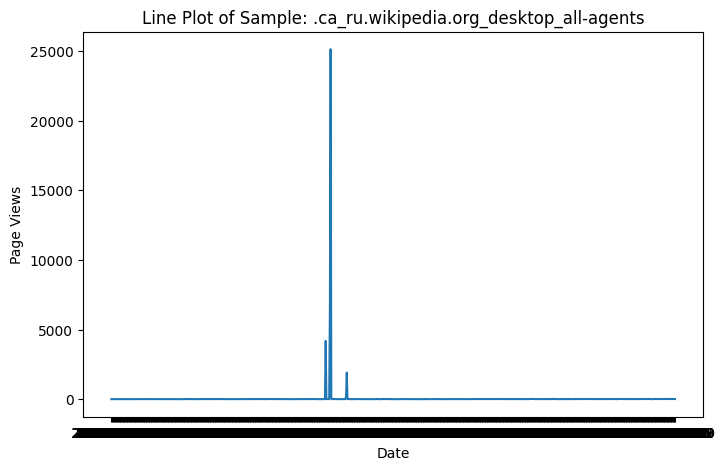

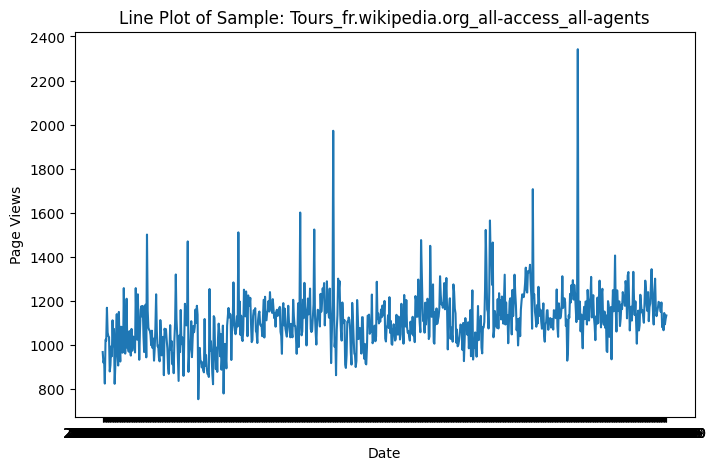

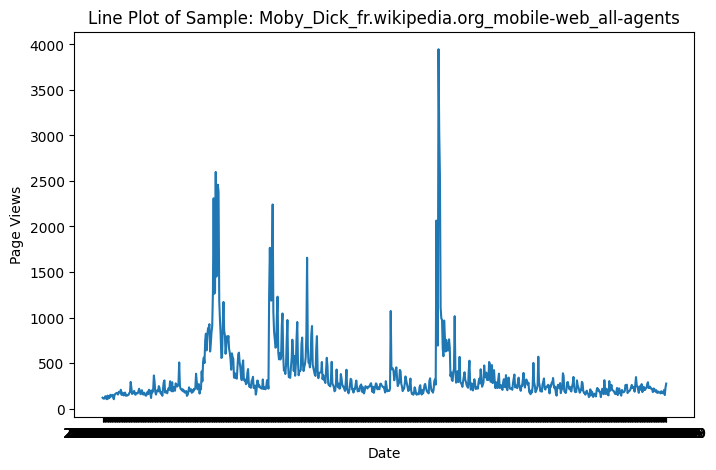

c:\Users\agraw\Documents\NEU\5th_Sem_May24\Capstone\wiki-forcast\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\agraw\Documents\NEU\5th_Sem_May24\Capstone\wiki-forcast\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\agraw\Documents\NEU\5th_Sem_May24\Capstone\wiki-forcast\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\agraw\Documents\NEU\5th_Sem_May24\Capstone\wiki-forcast\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

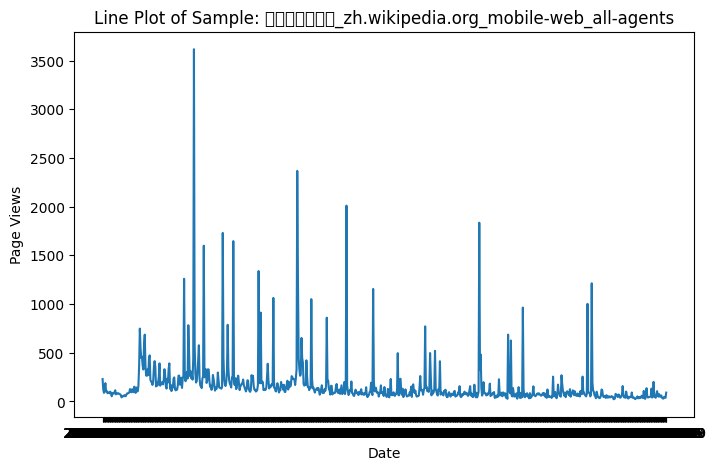

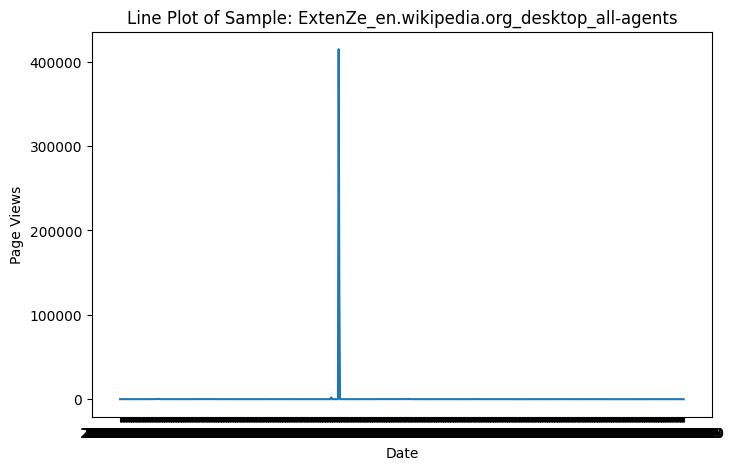

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Selecting 5 samples
samples = data.sample(5)

# Plotting individual line plots for the selected samples
for i, row in samples.iterrows():
    plt.figure(figsize=(8, 5))
    plt.plot(row.index[1:], row.values[1:])
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Line Plot of Sample: ' + row['page'])
    plt.show()

In [12]:
# Plotting individual line plots for the selected samples
for i, row in samples.iterrows():
    print(row['page'])


.ca_ru.wikipedia.org_desktop_all-agents
Tours_fr.wikipedia.org_all-access_all-agents
Moby_Dick_fr.wikipedia.org_mobile-web_all-agents
五個小孩的校長_zh.wikipedia.org_mobile-web_all-agents
ExtenZe_en.wikipedia.org_desktop_all-agents


In [24]:
data[data['page']=='ExtenZe_en.wikipedia.org_desktop_all-agents']

,page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
12364,ExtenZe_en.wikipedia.org_desktop_all-agents,97.0,125.0,89.0,93.0,88.0,122.0,109.0,101.0,111.0,...,78.0,66.0,71.0,88.0,46.0,65.0,34.0,48.0,41.0,56.0


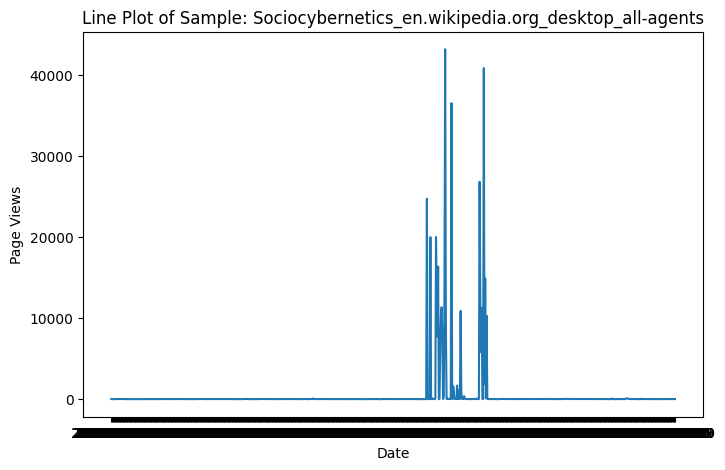

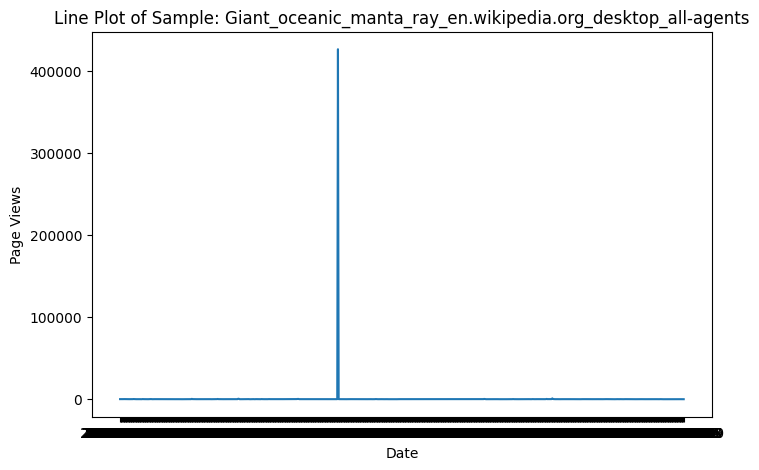

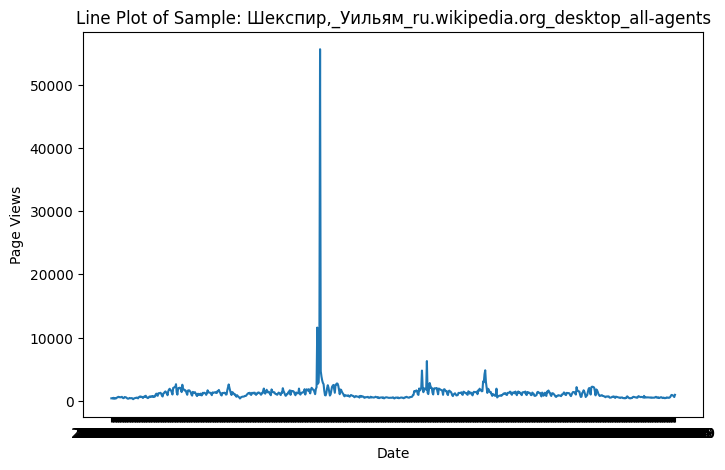

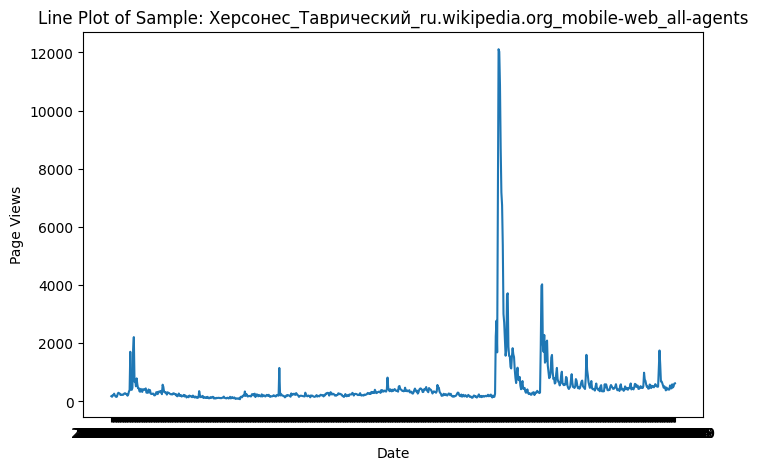

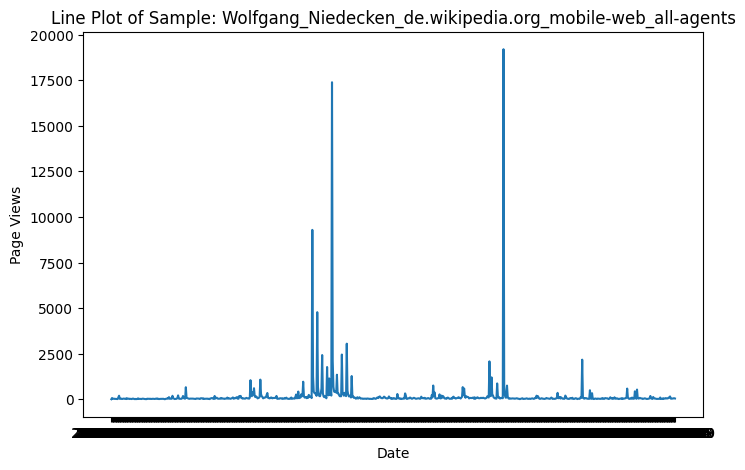

In [25]:
# Assuming 'data' is your DataFrame
# Selecting 5 samples
samples = data.sample(5)

# Plotting individual line plots for the selected samples
for i, row in samples.iterrows():
    plt.figure(figsize=(8, 5))
    plt.plot(row.index[1:], row.values[1:])
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Line Plot of Sample: ' + row['page'])
    plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = data.drop('page', axis=1).apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten(), axis=1)

# Combining with the 'page' column
scaled_data = pd.concat([data['page'], scaled_data], axis=1)


In [28]:
scaled_data

,page,0
0,2NE1_zh.wikipedia.org_all-access_spider,"[-0.20322212075819218, -0.47111882356818235, -..."
1,2PM_zh.wikipedia.org_all-access_spider,"[-0.38825469744420865, -0.3153150135837159, -0..."
2,3C_zh.wikipedia.org_all-access_spider,"[-0.34762019650203074, -0.4357322601987261, -0..."
3,4minute_zh.wikipedia.org_all-access_spider,"[1.0216563439035435, -0.25260099663585206, -0...."
5,5566_zh.wikipedia.org_all-access_spider,"[-0.3832624846188288, -0.7090721131906258, -0...."
...,...,...
144944,Chichén_Itzá_es.wikipedia.org_all-access_spider,"[-0.5223901095126101, -0.3192721267803682, -0...."
144945,Fecundación_es.wikipedia.org_all-access_spider,"[0.19092874531299633, -0.21508167887163776, -0..."
144946,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,"[-0.5447166882676532, -0.1856954838800262, -0...."
144947,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,"[-0.9033397201226977, -0.8025992444253814, -0...."


In [ ]:
from tqdm import tqdm
from collections import defaultdict
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found")

from utils import (
    extract_page_components, 
    extract_main_domain, 
    get_date_columns, 
    remove_incomplete_rows, 
    plot_time_series, 
    plot_seasonal_decompose,
    check_stationarity,
    get_cat_to_articles,
    filter_articles
)


ModuleNotFoundError: No module named 'tqdm'

### Read Data And Preprocess

In [ ]:
data = pd.read_csv('../data/train_2.csv')
data.rename(columns={
    'Page': 'page'
}, inplace=True)
data.shape

(145063, 804)

In [ ]:
page_info_df = data[['page']].copy()
page_info_df[['article', 'domain', 'locale', 'access', 'agent']] = page_info_df['page'].apply(lambda x: pd.Series(extract_page_components(x)))
page_info_df['main_domain'] = page_info_df['domain'].apply(extract_main_domain)
page_info_df.head()

,page,article,domain,locale,access,agent,main_domain
0,2NE1_zh.wikipedia.org_all-access_spider,2NE1,zh.wikipedia.org,zh,all-access,spider,wikipedia
1,2PM_zh.wikipedia.org_all-access_spider,2PM,zh.wikipedia.org,zh,all-access,spider,wikipedia
2,3C_zh.wikipedia.org_all-access_spider,3C,zh.wikipedia.org,zh,all-access,spider,wikipedia
3,4minute_zh.wikipedia.org_all-access_spider,4minute,zh.wikipedia.org,zh,all-access,spider,wikipedia
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,52_Hz_I_Love_You,zh.wikipedia.org,zh,all-access,spider,wikipedia


In [ ]:
page_info_df['article'].nunique()

49174

In [ ]:
date_columns = get_date_columns(data)

In [ ]:
data = remove_incomplete_rows(data)
data.shape

(115084, 804)

In [ ]:
merged_df = pd.merge(page_info_df[['page', 'article']], data, on='page', how='inner')
merged_df.drop('page', axis=1, inplace=True)
df = merged_df.groupby('article')[date_columns].sum().reset_index()
df.set_index('article', inplace=True)
df = df.T
df.index = pd.to_datetime(df.index)
df.head()

article,"""Weird_Al""_Yankovic",'Tis_the_Season,'Tis_the_Season_(Vince_Gill_and_Olivia_Newton-John_album),(1)_Ceres,(500)_Days_of_Summer,.ca,.xxx,0,0.999…,007:_Координаты_«Скайфолл»,...,龍八夷,龍円愛梨,龍應台,龍抬頭,龍涎香,龐茲騙局,龔嘉欣,龙生九子,대문,［Alexandros］
2015-07-01,2547.0,40.0,18.0,404.0,273.0,3.0,28048.0,293.0,79.0,125.0,...,758.0,169.0,353.0,3.0,147.0,466.0,617.0,95.0,339.0,10864.0
2015-07-02,20227.0,35.0,15.0,380.0,318.0,7.0,31576.0,362.0,56.0,115.0,...,1272.0,112.0,426.0,0.0,112.0,1101.0,795.0,86.0,405.0,11917.0
2015-07-03,1894.0,33.0,22.0,293.0,372.0,11.0,31695.0,278.0,39.0,105.0,...,1276.0,156.0,375.0,4.0,76.0,658.0,984.0,87.0,360.0,11443.0
2015-07-04,1472.0,42.0,18.0,229.0,299.0,8.0,34658.0,218.0,69.0,155.0,...,899.0,214.0,338.0,3.0,97.0,637.0,856.0,86.0,345.0,14064.0
2015-07-05,1380.0,19.0,8.0,224.0,398.0,5.0,33736.0,281.0,55.0,183.0,...,792.0,190.0,350.0,19.0,152.0,478.0,879.0,81.0,237.0,14148.0


### Categories From Wikipedia API

In [ ]:
cat_to_articles = get_cat_to_articles()

In [ ]:
cat_to_articles = filter_articles(cat_to_articles, df)

There are 34164 categories given by the Wikipedia API for 49174 articles

### Group the categories into a smaller number of overarching themes or topics [Topic Modeling]

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.parsing.preprocessing import remove_stopwords

from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

category_names = list(cat_to_articles.keys())

# Preprocessing 
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = str(text)
    text = text.replace("Category:", "")
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Preprocess category names
preprocessed_category_names = [preprocess_text(name) for name in category_names]

# Vectorize the preprocessed category names using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(preprocessed_category_names)

# Apply LDA to identify topics
num_topics = 20  
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Get the topic distribution for each category
topic_distribution = lda.transform(tfidf_matrix)

# Assign each category to the most probable topic
category_to_topic = {}
for i, category in enumerate(category_names):
    topic = np.argmax(topic_distribution[i])
    category_to_topic[category] = topic

# Group categories by their assigned topic
from collections import defaultdict
topic_to_categories = defaultdict(list)
for category, topic in category_to_topic.items():
    topic_to_categories[topic].append(category)

# Function to get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

# Get the feature names (words) from the TF-IDF vectorizer
tf_feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
top_words = get_top_words(lda, tf_feature_names, 10)

# Print the top words for each topic
for topic, words in top_words.items():
    print(f"Topic {topic}:")
    print(words)
    print("\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajaykarthicksenthilkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0:
['deaths', 'books', 'set', 'lgbt', 'user', 'children', '1992', 'animal', 'characters', '2006']


Topic 1:
['statements', 'articles', 'unsourced', 'dates', 'use', 'potentially', 'dated', 'containing', 'expanded', 'russian']


Topic 2:
['stubs', 'births', 'geography', 'sport', 'musical', 'groups', 'biography', 'competitions', 'american', 'poets']


Topic 3:
['united', 'states', 'summer', 'olympics', 'kingdom', 'described', 'dmy', '2016', 'murders', 'establishments']


Topic 4:
['actresses', 'actors', 'fictional', 'argentine', 'world', 'sportspeople', 'male', 'video', 'cup', 'expatriate']


Topic 5:
['albums', '20thcentury', '21stcentury', 'singers', 'women', 'spanish', 'italian', '19thcentury', 'male', '18thcentury']


Topic 6:
['australia', 'south', 'africa', 'african', 'america', 'london', 'establishments', 'radio', 'jews', '1991']


Topic 7:
['films', '2010s', 'comedy', 'american', 'drama', '2000s', 'action', '1990s', '1970s', 'thriller']


Topic 8:
['articles', 'lacking', 'r

In [ ]:
def create_article_topic_mappings(cat_to_articles, category_to_topic):
    article_to_topics = defaultdict(list)
    topic_to_articles = defaultdict(list)

    # Create article_to_topics mapping
    for category, articles in cat_to_articles.items():
        if category in category_to_topic:
            topic = category_to_topic[category]
            for article in articles:
                article_to_topics[article].append(topic)

    # Create topic_to_articles mapping
    for article, topics in article_to_topics.items():
        for topic in topics:
            topic_to_articles[topic].append(article)

    return article_to_topics, topic_to_articles

article_to_topics, topic_to_articles = create_article_topic_mappings(cat_to_articles, category_to_topic)

In [ ]:
def compute_within_cluster_variance(data_df, cluster_to_articles):
    scores = defaultdict(dict)
    scaler = StandardScaler()

    # Compute within-cluster variance for each cluster
    for cluster_id, articles in tqdm(cluster_to_articles.items(), total=len(cluster_to_articles.items())):
        filtered_articles = [article for article in articles if article in data_df.columns]
        if len(filtered_articles) < 10:
            continue  # Need at least 10 articles to compute any meaningful measure

        # Extract and standardize data
        category_data = scaler.fit_transform(data_df[filtered_articles].fillna(0).T)

        # Use PCA to reduce dimensionality for large data sets
        pca = PCA(n_components=min(category_data.shape) - 1 if category_data.shape[0] > 2 else 2)
        reduced_data = pca.fit_transform(category_data)

        # Calculate variance within the cluster
        variance = np.var(reduced_data, axis=0).mean()  # Average variance across all components
        scores[cluster_id] = [variance, len(filtered_articles)]

    return pd.DataFrame(scores, index=['Variance', 'Num_Articles']).T

within_cluster_variance = compute_within_cluster_variance(df, topic_to_articles)

within_cluster_variance


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]


,Variance,Num_Articles
13,1.001247,2474.0
16,1.001244,9768.0
1,1.001247,9205.0
8,1.001245,27386.0
0,1.001246,3348.0
10,1.001247,7559.0
5,1.001246,5814.0
11,1.001245,6190.0
4,1.001246,6235.0
6,1.001247,4912.0


In [ ]:
def create_aggregated_df(data_df, topic_to_articles):
    # Initialize an empty DataFrame with the same index as data_df
    aggregated_df = pd.DataFrame(index=data_df.index)

    # Iterate over each topic and its articles
    for topic_id, articles in topic_to_articles.items():
        # Filter the articles that are present in the DataFrame
        valid_articles = [article for article in articles if article in data_df.columns]
        
        if not valid_articles:
            continue
        
        # Sum the view counts of the valid articles for each day
        aggregated_df[topic_id] = data_df[valid_articles].sum(axis=1)
    
    return aggregated_df

aggregated_df = create_aggregated_df(df, topic_to_articles)


aggregated_df.head()

,13,16,1,8,0,10,5,11,4,6,19,3,12,18,7,15,14,9,17,2
2015-07-01,10124971.0,29419089.0,42795832.0,64750778.0,9321821.0,24711855.0,26301627.0,33692641.0,32264321.0,14886638.0,11871212.0,9828925.0,15870210.0,9737856.0,24416955.0,18389903.0,6333682.0,6868109.0,5984525.0,8342568.0
2015-07-02,10089112.0,28271119.0,41776052.0,67096147.0,9216624.0,23742452.0,25775156.0,32254407.0,30797235.0,14234917.0,11558745.0,9597687.0,15506870.0,9798491.0,22802824.0,18148746.0,6306469.0,6476890.0,5899968.0,8349222.0
2015-07-03,9621115.0,27558367.0,39750851.0,63502550.0,8800607.0,22162277.0,25479714.0,30856697.0,30742547.0,13889369.0,11440798.0,9488362.0,14782261.0,9151174.0,22779877.0,17210956.0,6104186.0,6143090.0,5642849.0,7515333.0
2015-07-04,10045626.0,30119400.0,45546694.0,67496135.0,9018124.0,24610430.0,25608157.0,31111275.0,33522981.0,14006628.0,11633518.0,11252645.0,16801252.0,9074687.0,23625741.0,17051395.0,6270223.0,6062413.0,5866762.0,8221497.0
2015-07-05,10927807.0,32097612.0,45774538.0,70326200.0,9854583.0,25047360.0,27603064.0,34335325.0,37345057.0,15545599.0,12768789.0,10721934.0,16889162.0,10688184.0,26563391.0,19687148.0,6588101.0,6435513.0,6296921.0,8748261.0


In [ ]:
def fit_sarima(series, p, d, q, P, D, Q, s, exog=None):
    model = SARIMAX(series, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            fitted_model = model.fit(disp=False)
    except Exception as e:
        print(f"Fitting SARIMA({p},{d},{q}) x ({P},{D},{Q},{s}) failed with default start parameters: {e}")
        # Retry with initial parameters set to zero
        try:
            fitted_model = model.fit(start_params=[0] * (p + q + P + Q))
        except Exception as e:
            print(f"Retry fitting SARIMA({p},{d},{q}) x ({P},{D},{Q},{s}) failed: {e}")
            return None
    return fitted_model

def find_best_sarima_model(time_series, p_values, d_values, q_values, P_values, D_values, Q_values, s, exog=None):
    best_aic = np.inf
    best_order = None
    best_seasonal_order = None
    best_model = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            try:
                                model = fit_sarima(time_series, p, d, q, P, D, Q, s, exog)
                                if model is not None and model.aic < best_aic:
                                    best_aic = model.aic
                                    best_order = (p, d, q)
                                    best_seasonal_order = (P, D, Q, s)
                                    best_model = model
                            except Exception as e:
                                print(f"Failed to fit SARIMA({p},{d},{q}) x ({P},{D},{Q},{s}): {str(e)}")
    
    return {"order": best_order, "seasonal_order": best_seasonal_order, "model": best_model, "aic": best_aic}

def get_time_series_and_exog(data, page_name):
    time_series = data[page_name]
    time_series = time_series.asfreq('D')
    
     # Day of the week
    day_of_week = pd.to_datetime(time_series.index).dayofweek
    exog_dow = pd.get_dummies(day_of_week, prefix='dow').astype(int)
    exog_dow.index = time_series.index
    
    # Month of the year
    month_of_year = pd.to_datetime(time_series.index).month
    exog_month = pd.get_dummies(month_of_year, prefix='month').astype(int)
    exog_month.index = time_series.index
    
    # Is weekend
    is_weekend = (day_of_week >= 5).astype(int)
    exog_weekend = pd.DataFrame(is_weekend, index=time_series.index, columns=['is_weekend'])
    
    # Is holiday
    holidays = calendar().holidays(start=time_series.index.min(), end=time_series.index.max())
    is_holiday = time_series.index.isin(holidays).astype(int)
    exog_holiday = pd.DataFrame(is_holiday, index=time_series.index, columns=['is_holiday'])
    
    # Combine all exogenous features
    exog = pd.concat([exog_dow, exog_month, exog_weekend, exog_holiday], axis=1)
    
    return time_series, exog

def train_test_split(series, exog, test_size):
    train = series[:-test_size]
    test = series[-test_size:]
    train_exog = exog[:-test_size]
    test_exog = exog[-test_size:]
    return train, test, train_exog, test_exog

def process_page(page_name, data, date_columns, p_values, d_values, q_values, P_values, D_values, Q_values, S, test_size):
    print(f"Processing SARIMA models for page: {page_name}")
        
    # Get the time series data for the page
    time_series, exog = get_time_series_and_exog(data, page_name)
    
    # Skip the current iteration if no data was found
    if time_series is None:
        return

    # Determine if the series is stationary
    is_stationary = check_stationarity(time_series)

    # Adjust d_values based on stationarity
    adjusted_d_values = [0] if is_stationary else d_values

    # Split the data into training and testing sets
    train_series, test_series, train_exog, test_exog =  train_test_split(time_series, exog, test_size)

    # Find the best ARIMA model for the time series
    best_model_info = find_best_sarima_model(train_series, p_values, adjusted_d_values, q_values, P_values, D_values, Q_values, S, exog=train_exog)
    
    print(f"Best SARIMA model for {page_name}: Order={best_model_info['order']} AIC={best_model_info['aic']:.2f}")

    return best_model_info


def process_and_save_models(data, date_columns, p_values, d_values, q_values, P_values, D_values, Q_values, S, test_size):
    # Iterate over all unique pages in the DataFrame
    for page_name in data.columns:
        best_model_info = process_page(page_name, data, date_columns, p_values, d_values, q_values, P_values, D_values, Q_values, S, test_size)
        if best_model_info is not None:
            # Save each model's information into a separate pickle file
            with open(f'best_agg_model_{page_name}.pkl', 'wb') as f:
                pickle.dump(best_model_info, f)

p_values = [0]
d_values = [1]
q_values = [0]
P_values = [1]
D_values = [1]
Q_values = [0]
s = 60

test_size = 30
process_and_save_models(aggregated_df, date_columns, p_values, d_values, q_values, P_values, D_values, Q_values, s, test_size)

Processing SARIMA models for page: 13
Best SARIMA model for 13: Order=(0, 0, 0) AIC=23413.63
Processing SARIMA models for page: 16
Best SARIMA model for 16: Order=(0, 1, 0) AIC=23606.59
Processing SARIMA models for page: 1
Best SARIMA model for 1: Order=(0, 1, 0) AIC=24083.14
Processing SARIMA models for page: 8
Best SARIMA model for 8: Order=(0, 1, 0) AIC=24858.81
Processing SARIMA models for page: 0
Best SARIMA model for 0: Order=(0, 0, 0) AIC=23675.14
Processing SARIMA models for page: 10
Best SARIMA model for 10: Order=(0, 1, 0) AIC=24007.15
Processing SARIMA models for page: 5
Best SARIMA model for 5: Order=(0, 0, 0) AIC=25021.78
Processing SARIMA models for page: 11
Best SARIMA model for 11: Order=(0, 1, 0) AIC=24629.90
Processing SARIMA models for page: 4
Best SARIMA model for 4: Order=(0, 1, 0) AIC=24362.28
Processing SARIMA models for page: 6
Best SARIMA model for 6: Order=(0, 1, 0) AIC=23084.16
Processing SARIMA models for page: 19
Best SARIMA model for 19: Order=(0, 1, 0) AI

In [ ]:
# def smape(actual, forecast):
#     return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

# def check_residuals(model):
#     residuals = model.resid
#     fig, ax = plt.subplots(1, 2, figsize=(15, 6))
#     residuals.plot(ax=ax[0], title="Residuals")
#     residuals.plot(kind='kde', ax=ax[1], title="Density")
#     plt.show()
    
# def plot_forecast_vs_actual(train_series, test_series, train_exog, test_exog, model):
#     fig, ax = plt.subplots(figsize=(14, 7))
#     ax.plot(train_series, label='Train', color='blue', linewidth=1)
#     ax.plot(test_series, label='Test', color='orange', linewidth=1)
    
#     # In-sample forecast
#     in_sample_forecast = model.fittedvalues
#     ax.plot(in_sample_forecast, label='In-sample Forecast', color='green', linestyle='--', linewidth=2)
    
#     # Out-of-sample forecast
#     forecast = model.get_forecast(steps=len(test_series), exog=test_exog)
#     forecast_index = pd.date_range(start=test_series.index[0], periods=len(test_series), freq='D')
#     forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
#     ax.plot(forecast_series, label='Out-of-sample Forecast', color='red', linestyle='--', linewidth=2)

#     sMAPE_value = smape(test_series, forecast_series)
#     print(f'sMAPE: {sMAPE_value:.2f}%')
    
#     # Adding titles and labels
#     ax.set_title('Actual vs Forecasted Values', fontsize=16)
#     ax.set_xlabel('Date', fontsize=14)
#     ax.set_ylabel('Page Views', fontsize=14)
    
#     # Adding legend
#     ax.legend(loc='upper left', fontsize=12)
    
#     # Adding grid for better readability
#     ax.grid(True)
    
#     # Improving the appearance
#     plt.tight_layout()
    
#     plt.show()

# def plot_model_forecast(data, best_models_per_page, date_columns, page_name, test_size):
#     if page_name not in best_models_per_page:
#         print(f"No model found for page: {page_name}")
#         return
    
#     best_model_info = best_models_per_page[page_name]
#     model = best_model_info['model']
    
#     time_series, exog = get_time_series_and_exog(data, page_name)
    
#     if time_series is not None:
#         train_series, test_series, train_exog, test_exog = train_test_split(time_series, exog, test_size)
#         plot_forecast_vs_actual(train_series, test_series, train_exog, test_exog, model)
#         check_residuals(model)


# page_name = 0

# plot_model_forecast(aggregated_df, best_models_per_page, date_columns, page_name, test_size)

In [ ]:
# Assuming aggregated_df is your DataFrame with dates as the index
aggregated_df.to_csv('aggregated_df.csv', index_label='date')

In [ ]:
# import pickle

# with open('best_models_per_page.pkl', 'wb') as f:
#     pickle.dump(best_models_per_page, f)

In [ ]:
# import pickle
# best_models_per_page_str_keys = {str(key): value for key, value in best_models_per_page.items()}

# # Serialize and save the dictionary to a file
# with open('best_models_per_page.pkl', 'wb') as f:
#     pickle.dump(best_models_per_page_str_keys, f)

In [ ]:
# topic_names = {
#     0: "Biographical Information and Entertainment",
#     1: "Articles Needing References and Identifiers",
#     2: "Television Series and Science Fiction",
#     3: "Films and Literature",
#     4: "African American and European Establishments",
#     5: "Geographical Locations and Establishments",
#     6: "Deaths, Actors, and Sports",
#     7: "External Links and History",
#     8: "Geography and Sports Stubs",
#     9: "Writers and Politicians",
#     10: "Articles Containing Text and Statements",
#     11: "Albums and University Establishments",
#     12: "Songs and Sports Events",
#     13: "Fictional Characters and Competitions",
#     14: "Players and Structures",
#     15: "People and Football",
#     16: "Software and Political Information",
#     17: "Redirects and Films",
#     18: "People of Various Descent",
#     19: "United States and Businesspeople"
# }

In [ ]:
# def plot_pca_for_two_topics(views_df, topic_to_articles, topic1, topic2, num_days=10):
#     # Select articles from the two topics
#     articles_topic1 = set(topic_to_articles[topic1])
#     articles_topic2 = set(topic_to_articles[topic2])

#     # Identify common articles and remove them from one of the topics
#     common_articles = articles_topic1.intersection(articles_topic2)
#     articles_topic1 = articles_topic1 - common_articles
#     articles_topic2 = articles_topic2 - common_articles

#     # Combine the remaining articles
#     selected_articles = list(articles_topic1.union(articles_topic2))
    
#     view_counts = views_df[selected_articles].iloc[:num_days].fillna(0).T

#     # Standardize the data
#     scaler = StandardScaler()
#     view_counts_scaled = scaler.fit_transform(view_counts)

#     # Apply PCA
#     pca = PCA(n_components=2)
#     principal_components = pca.fit_transform(view_counts_scaled)

#     # Create a DataFrame with the principal components
#     pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
#     pca_df['Topic'] = ['Topic1'] * len(articles_topic1) + ['Topic2'] * len(articles_topic2)

#     # Plot the results
#     plt.figure(figsize=(10, 7))
#     colors = {'Topic1': 'red', 'Topic2': 'blue'}
#     for topic in ['Topic1', 'Topic2']:
#         indices_to_keep = pca_df['Topic'] == topic
#         plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
#                     pca_df.loc[indices_to_keep, 'PC2'],
#                     c=colors[topic], s=50)

#     plt.title(f'PCA of Articles in Topics {topic1} and {topic2}')
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.legend(['Topic1', 'Topic2'])
#     plt.show()


# plot_pca_for_two_topics(df, topic_to_articles, topic1=0, topic2=1, num_days=-1)

In [ ]:
def compute_within_cluster_variance(data_df, category_to_topic, topic_names):
    scores = defaultdict(dict)
    scaler = StandardScaler()

    # Group articles by topics
    topic_to_articles = defaultdict(list)
    for category, topic in category_to_topic.items():
        topic_to_articles[topic].extend(cat_to_articles[category])

    # Compute within-cluster variance for each topic
    for topic, articles in tqdm(topic_to_articles.items(), total=len(topic_to_articles.items())):
        filtered_articles = [article for article in articles if article in data_df.columns]
        if len(filtered_articles) < 10:
            continue  # Need at least 10 articles to compute any meaningful measure

        # Extract and standardize data
        category_data = scaler.fit_transform(data_df[filtered_articles].fillna(0).T)

        # Use PCA to reduce dimensionality for large data sets
        pca = PCA(n_components=min(category_data.shape) - 1 if category_data.shape[0] > 2 else 2)
        reduced_data = pca.fit_transform(category_data)

        # Calculate variance within the cluster
        variance = np.var(reduced_data, axis=0).mean()  # Average variance across all components
        scores[topic_names[topic]] = variance

    return pd.Series(scores)

within_cluster_variance = compute_within_cluster_variance(df, category_to_topic, topic_names)

print(within_cluster_variance)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]

Software and Political Information              1.001247
Biographical Information and Entertainment      1.001247
Films and Literature                            1.001246
External Links and History                      1.001246
Articles Containing Text and Statements         1.001246
Articles Needing References and Identifiers     1.001246
Redirects and Films                             1.001245
United States and Businesspeople                1.001246
People and Football                             1.001247
Albums and University Establishments            1.001246
Geographical Locations and Establishments       1.001247
Players and Structures                          1.001247
Songs and Sports Events                         1.001247
People of Various Descent                       1.001246
Geography and Sports Stubs                      1.001247
Writers and Politicians                         1.001246
Television Series and Science Fiction           1.001247
Deaths, Actors, and Sports     

In [ ]:
topic_to_articles = defaultdict(list)
for category, topic in category_to_topic.items():
    topic_to_articles[topic].extend(cat_to_articles[category])

topic_to_articles[15]

['4minute',
 'ASTRO',
 'BEAST',
 'BLACK_PINK',
 'BLEACH',
 'BTOB',
 'CHAOS;HEAD',
 'DIA',
 'Doctors',
 'EGOIST',
 'EXO',
 'FAIRY_TAIL',
 'IKON',
 'MAMAMOO',
 'NEW_GAME!',
 'ONE_OK_ROCK',
 'ONE_PIECE',
 'RADWIMPS',
 'Red_Velvet',
 'SHINee',
 'SISTAR',
 'Schwarzesmarken',
 'TWICE',
 'Twins',
 'Xss',
 'xss',
 '日本',
 '張惠妹',
 '嵐',
 '0.999…',
 '曾鈺成',
 '粽',
 '中國',
 '大熊猫',
 '@',
 'Amazon.com',
 'Art_nouveau',
 'Australie',
 "Ballon_d'or",
 'Barcelone',
 'Basket-ball',
 'Belgique',
 'Blade_Runner_(film)',
 'Blindspot',
 'Blue_Bloods',
 'Californie',
 'Designated_Survivor',
 'Doctor_Strange_(film)',
 'Donald_Trump,_Jr.',
 'Environnement',
 'Fences',
 'Finlande',
 'Game_of_thrones',
 'Gengis_Khan',
 'Gravity_(film)',
 'Groenland',
 'Int',
 'JoeyStarr',
 'Kim_Jong-un',
 'Labrador_retriever',
 'Le_Clan_des_Siciliens',
 'Marie_Stuart',
 'Martin_Luther_King',
 'Nikola_Karabatic',
 'Porto_Rico',
 'Punisher_(comics)',
 'Serbie',
 'Singapour',
 'Sp',
 'Split_(film)',
 'Steve_Holmes',
 'Tess_(film)',
 'T

{0: 'Biographical Information and Entertainment',
 1: 'Articles Needing References and Identifiers',
 2: 'Television Series and Science Fiction',
 3: 'Films and Literature',
 4: 'African American and European Establishments',
 5: 'Geographical Locations and Establishments',
 6: 'Deaths, Actors, and Sports',
 7: 'External Links and History',
 8: 'Geography and Sports Stubs',
 9: 'Writers and Politicians',
 10: 'Articles Containing Text and Statements',
 11: 'Albums and University Establishments',
 12: 'Songs and Sports Events',
 13: 'Fictional Characters and Competitions',
 14: 'Players and Structures',
 15: 'People and Football',
 16: 'Software and Political Information',
 17: 'Redirects and Films',
 18: 'People of Various Descent',
 19: 'United States and Businesspeople'}